# LIBSVM

In [1]:
import sys
sys.path.append(r'C:\Users\Jason\Desktop\ML_HW5_0760406_楊潔生\libsvm-3.23\python')
sys.path.append(r'C:\Users\Jason\Desktop\ML_HW5_0760406_楊潔生\libsvm-3.23\tools')

In [2]:
from svmutil import *
from grid import *

。 CSV to LIBSVM format

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import csv

In [4]:
f = open('.\X_train.csv','r')
arr_tr = csv.reader(f)
arr_tr = np.array(list(arr_tr)).astype(float) # 5000*784

f = open('.\X_test.csv','r')
arr_ts = csv.reader(f)
arr_ts = np.array(list(arr_ts)).astype(float) # 2500*784

f = open('.\Y_train.csv','r')
label_tr = csv.reader(f)
label_tr = np.array(list(label_tr)).astype(int) # 5000*1

f = open('.\Y_test.csv','r')
label_ts = csv.reader(f)
label_ts = np.array(list(label_ts)).astype(int) # 2500*1

In [6]:
ftr = open("trlibsvm", "w")
for item, line in enumerate(arr_tr): # item: 0-4999.index; line: 0-4999.value
    ftr.write("{} ".format(label_tr[item][0])) #label + img
    for index, word in enumerate(line): # index: 0-783.index ; word.values
        ftr.write("{}:{} ".format(index+1, word))
    ftr.write("\n")
ftr.close()

In [7]:
fts = open("tslibsvm", "w")
for item, line in enumerate(arr_ts): # item: 0-2499.index; line: 0-2499.value
    fts.write("{} ".format(label_ts[item][0])) #label + img
    for index, word in enumerate(line): # index: 0-783.index ; word.values
        fts.write("{}:{} ".format(index+1, word))
    fts.write("\n")
fts.close()

。 Linear, Polynomial, and RBF kernels

In [5]:
ytr, xtr = svm_read_problem(r'C:\Users\Jason\Desktop\ML_HW5_0760406_楊潔生\trlibsvm') #read traning dataset
yts, xts = svm_read_problem(r'C:\Users\Jason\Desktop\ML_HW5_0760406_楊潔生\tslibsvm') 

In [6]:
%%time
ml = svm_train(ytr, xtr,'-t 0' ) #train
line_label, line_acc, line_val = svm_predict(yts,xts,ml)  #linear

Accuracy = 95.08% (2377/2500) (classification)
Wall time: 3.88 s


In [8]:
%%time
mp = svm_train(ytr, xtr,'-t 1' ) #train
Poly_label, Poly_acc, Poly_val = svm_predict(yts,xts,mp)  #Polynomial

Accuracy = 34.68% (867/2500) (classification)
Wall time: 31.8 s


In [9]:
%%time
mr = svm_train(ytr, xtr,'-t 2' ) #train
RBF_label, RBF_acc, RBF_val = svm_predict(yts,xts,mr)  #RBF

Accuracy = 95.32% (2383/2500) (classification)
Wall time: 7.84 s


In [12]:
print ("    Linear: ACC:",line_acc[0],"MSE:",line_acc[1])
print ("Polynomial: ACC:",Poly_acc[0],"MSE:",Poly_acc[1])
print ("       RBF: ACC:",RBF_acc[0],"MSE:",RBF_acc[1])

    Linear: ACC: 95.08 MSE: 0.1404
Polynomial: ACC: 34.68 MSE: 2.6212
       RBF: ACC: 95.32000000000001 MSE: 0.1492


。 grid seach & 5-fold cross validation

In [5]:
from grid import *

In [12]:
rate, param = find_parameters('./trlibsvm', '-log2c -6,8,1 -log2g null -t 0 -v 5')

gnuplot executable not found


[local] 1.0 96.14 (best c=2.0, rate=96.14)
[local] -3.0 96.62 (best c=0.125, rate=96.62)
[local] 5.0 96.14 (best c=0.125, rate=96.62)
[local] -5.0 96.96 (best c=0.03125, rate=96.96)
[local] 3.0 96.14 (best c=0.03125, rate=96.96)
[local] -1.0 96.04 (best c=0.03125, rate=96.96)
[local] 7.0 96.14 (best c=0.03125, rate=96.96)
[local] -6.0 96.96 (best c=0.015625, rate=96.96)
[local] 2.0 96.14 (best c=0.015625, rate=96.96)
[local] -2.0 96.34 (best c=0.015625, rate=96.96)
[local] 6.0 96.14 (best c=0.015625, rate=96.96)
[local] -4.0 96.86 (best c=0.015625, rate=96.96)
[local] 4.0 96.14 (best c=0.015625, rate=96.96)
[local] 0.0 96.14 (best c=0.015625, rate=96.96)
[local] 8.0 96.14 (best c=0.015625, rate=96.96)
0.015625 96.96


In [13]:
print (param)

{'c': 0.015625}


In [14]:
ratep, paramp = find_parameters('./trlibsvm', '-log2c -6,8,1 -log2g null -t 1 -v 5')

gnuplot executable not found


[local] 1.0 40.14 (best c=2.0, rate=40.14)
[local] -3.0 28.42 (best c=2.0, rate=40.14)
[local] 5.0 87.74 (best c=32.0, rate=87.74)
[local] -5.0 28.42 (best c=32.0, rate=87.74)
[local] 3.0 72.4 (best c=32.0, rate=87.74)
[local] -1.0 28.42 (best c=32.0, rate=87.74)
[local] 7.0 93.76 (best c=128.0, rate=93.76)
[local] -6.0 28.42 (best c=128.0, rate=93.76)
[local] 2.0 58.68 (best c=128.0, rate=93.76)
[local] -2.0 28.42 (best c=128.0, rate=93.76)
[local] 6.0 91.5 (best c=128.0, rate=93.76)
[local] -4.0 28.42 (best c=128.0, rate=93.76)
[local] 4.0 81.66 (best c=128.0, rate=93.76)
[local] 0.0 32.54 (best c=128.0, rate=93.76)
[local] 8.0 95.54 (best c=256.0, rate=95.54)
256.0 95.54


In [15]:
rateR, paramR = find_parameters('./trlibsvm', '-log2c -6,8,1 -log2g -6,8,1 -t 2 -v 5')

gnuplot executable not found


[local] 1.0 1.0 25.6 (best c=2.0, g=2.0, rate=25.6)
[local] 1.0 -3.0 85.6 (best c=2.0, g=0.125, rate=85.6)
[local] -3.0 1.0 20.34 (best c=2.0, g=0.125, rate=85.6)
[local] -3.0 -3.0 47.9 (best c=2.0, g=0.125, rate=85.6)
[local] 1.0 5.0 36.74 (best c=2.0, g=0.125, rate=85.6)
[local] -3.0 5.0 55.9 (best c=2.0, g=0.125, rate=85.6)
[local] 5.0 1.0 25.6 (best c=2.0, g=0.125, rate=85.6)
[local] 5.0 -3.0 85.6 (best c=2.0, g=0.125, rate=85.6)
[local] 5.0 5.0 36.74 (best c=2.0, g=0.125, rate=85.6)
[local] 1.0 -5.0 98.5 (best c=2.0, g=0.03125, rate=98.5)
[local] -3.0 -5.0 97.06 (best c=2.0, g=0.03125, rate=98.5)
[local] 5.0 -5.0 98.52 (best c=32.0, g=0.03125, rate=98.52)
[local] -5.0 1.0 20.34 (best c=32.0, g=0.03125, rate=98.52)
[local] -5.0 -3.0 41.96 (best c=32.0, g=0.03125, rate=98.52)
[local] -5.0 5.0 55.84 (best c=32.0, g=0.03125, rate=98.52)
[local] -5.0 -5.0 94.84 (best c=32.0, g=0.03125, rate=98.52)
[local] 1.0 3.0 20.9 (best c=32.0, g=0.03125, rate=98.52)
[local] -3.0 3.0 79.02 (best c=

[local] -4.0 2.0 35.86 (best c=4.0, g=0.03125, rate=98.52)
[local] -4.0 -2.0 26.12 (best c=4.0, g=0.03125, rate=98.52)
[local] -4.0 6.0 39.06 (best c=4.0, g=0.03125, rate=98.52)
[local] -4.0 -4.0 75.58 (best c=4.0, g=0.03125, rate=98.52)
[local] 1.0 4.0 64.66 (best c=4.0, g=0.03125, rate=98.52)
[local] -3.0 4.0 76.0 (best c=4.0, g=0.03125, rate=98.52)
[local] 5.0 4.0 64.66 (best c=4.0, g=0.03125, rate=98.52)
[local] -5.0 4.0 76.0 (best c=4.0, g=0.03125, rate=98.52)
[local] 3.0 4.0 64.66 (best c=4.0, g=0.03125, rate=98.52)
[local] -1.0 4.0 76.02 (best c=4.0, g=0.03125, rate=98.52)
[local] 7.0 4.0 64.66 (best c=4.0, g=0.03125, rate=98.52)
[local] -6.0 4.0 75.96 (best c=4.0, g=0.03125, rate=98.52)
[local] 2.0 4.0 64.66 (best c=4.0, g=0.03125, rate=98.52)
[local] -2.0 4.0 76.0 (best c=4.0, g=0.03125, rate=98.52)
[local] 6.0 4.0 64.66 (best c=4.0, g=0.03125, rate=98.52)
[local] -4.0 4.0 76.0 (best c=4.0, g=0.03125, rate=98.52)
[local] 4.0 1.0 25.6 (best c=4.0, g=0.03125, rate=98.52)
[local]

。 train the SVM using a precomputed kernel :linear kernel+RBF kernel

In [6]:
import scipy.spatial.distance as dist

In [7]:
ytr, xtr = svm_read_problem(r'C:\Users\Jason\Desktop\ML_HW5_0760406_楊潔生\trlibsvm') #read traning dataset
yts, xts = svm_read_problem(r'C:\Users\Jason\Desktop\ML_HW5_0760406_楊潔生\tslibsvm') 

In [8]:
#create dense data-train
max_key1 = np.max([np.max(v1.keys()) for v1 in xtr])
arr1 = np.zeros((len(xtr),len(max_key1)))

for row1,vec1 in enumerate(xtr):
    for k1,v1 in vec1.items():
        arr1[row1][k1-1] = v1
x1 = arr1

#create dense data-test
max_key2 = np.max([np.max(v2.keys()) for v2 in xts])
arr2 = np.zeros((len(xts),len(max_key2)))

for row2,vec2 in enumerate(xts):
    for k2,v2 in vec2.items():
        arr2[row2][k2-1] = v2
x2 = arr2

In [28]:
# RBF: exp(-gamma*|u-v|^2)
gamma = 2e-3;
def LRBF(X,Y):
        LRBF = np.exp(-gamma * dist.cdist(X, Y)**2)+gamma*np.dot(X,Y.T)
        return LRBF

In [30]:
%%time
#create a RBF kernel matrix
KR_tr = np.zeros((5000,5001))
KR_tr[:,1:] = LRBF(x1,x1)
KR_tr[:,:1] = np.arange(5000)[:,np.newaxis]+1

mR = svm_train(ytr, KR_tr, '-t 4')

KR_ts = np.zeros((2500,5001))
KR_ts[:,1:] = LRBF(x2,x1)
KR_ts[:,:1] = np.arange(2500)[:,np.newaxis]+1

p_labelR, p_accR, p_valR = svm_predict(yts, KR_ts, mR)
print("ACC",p_accR[0])
print("MSE",p_accR[1])

Accuracy = 95.88% (2397/2500) (classification)
ACC 95.88
MSE 0.132
Wall time: 52.5 s


# Find out support vectors

In [31]:
title = ['Linear','Polynomial','RBF','Linear+RBF']

In [32]:
f = open('.\Plot_X.csv','r')
arr = csv.reader(f)
arr = np.array(list(arr)).astype(float) # 3000*2

f = open('.\Plot_Y.csv','r')
lab = csv.reader(f)
lab = np.array(list(lab)).astype(float) # 3000*1

In [33]:
f = open("plot_libsvm", "w")
for item, line in enumerate(arr):
    f.write("{} ".format(lab[item][0])) #label + xy
    for index, word in enumerate(line):
        f.write("{}:{} ".format(index+1, word))
    f.write("\n")
f.close()

In [34]:
y, x = svm_read_problem(r'C:\Users\Jason\Desktop\ML_HW5_0760406_楊潔生\plot_libsvm')

In [40]:
pml = svm_train(y, x,'-c 1.0 -t 0' )
l_label, l_acc, l_val = svm_predict(y,x,pml) #linear

Accuracy = 99.5667% (2987/3000) (classification)


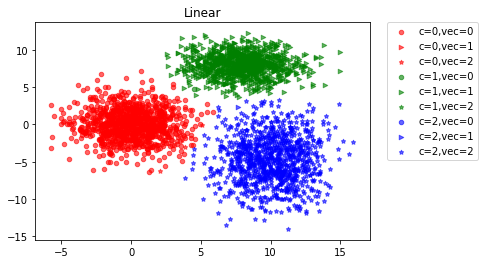

In [45]:
dot=[]
l_label=np.asarray(l_label)
index0=np.where(l_label == 0.0)
index1=np.where(l_label == 1.0)
index2=np.where(l_label == 2.0)
dot.append(index0[0][np.where(index0[0] < 1000)])
dot.append(index0[0][np.where((index0[0] >=1000)&(index0[0] <2000))])
dot.append(index0[0][np.where(index0[0] >= 2000)])
dot.append(index1[0][np.where(index1[0] < 1000)])
dot.append(index1[0][np.where((index1[0] >=1000)&(index1[0] <2000))])
dot.append(index1[0][np.where(index1[0] >= 2000)])
dot.append(index2[0][np.where(index2[2000:3000] == 0.0)])
dot.append(index2[0][np.where((index2[0] >=1000)&(index2[0] <2000))])
dot.append(index2[0][np.where(index2[0] >= 2000)])

plt.scatter(arr[dot[0],0], arr[dot[0],1], s=20,c='r',marker="o", alpha=0.6, label='c=0,vec=0')
plt.scatter(arr[dot[1],0], arr[dot[1],1], s=20,c='r',marker=">", alpha=0.6, label='c=0,vec=1')
plt.scatter(arr[dot[2],0], arr[dot[2],1], s=20,c='r',marker=(5, 1), alpha=0.6, label='c=0,vec=2')
plt.scatter(arr[dot[3],0], arr[dot[3],1], s=20,c='g',marker="o", alpha=0.6, label='c=1,vec=0')
plt.scatter(arr[dot[4],0], arr[dot[4],1], s=20,c='g',marker=">", alpha=0.6, label='c=1,vec=1')
plt.scatter(arr[dot[5],0], arr[dot[5],1], s=20,c='g',marker=(5, 1), alpha=0.6, label='c=1,vec=2')
plt.scatter(arr[dot[6],0], arr[dot[6],1], s=20,c='b',marker="o", alpha=0.6, label='c=2,vec=0')
plt.scatter(arr[dot[7],0], arr[dot[7],1], s=20,c='b',marker=">", alpha=0.6, label='c=2,vec=1')
plt.scatter(arr[dot[8],0], arr[dot[8],1], s=20,c='b',marker=(5, 1), alpha=0.6, label='c=2,vec=2')

plt.title(title[0])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

In [36]:
mp = svm_train(y, x,'-c 0.00390625 -t 1' )
Poly_label, Poly_acc, Poly_val = svm_predict(y,x,mp) #Polynomial

Accuracy = 99.4667% (2984/3000) (classification)


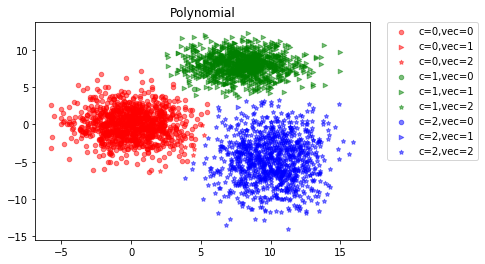

In [46]:
dot=[]
Poly_label=np.asarray(Poly_label)
index0=np.where(Poly_label == 0.0)
index1=np.where(Poly_label == 1.0)
index2=np.where(Poly_label == 2.0)
dot.append(index0[0][np.where(index0[0] < 1000)])
dot.append(index0[0][np.where((index0[0] >=1000)&(index0[0] <2000))])
dot.append(index0[0][np.where(index0[0] >= 2000)])
dot.append(index1[0][np.where(index1[0] < 1000)])
dot.append(index1[0][np.where((index1[0] >=1000)&(index1[0] <2000))])
dot.append(index1[0][np.where(index1[0] >= 2000)])
dot.append(index2[0][np.where(index2[2000:3000] == 0.0)])
dot.append(index2[0][np.where((index2[0] >=1000)&(index2[0] <2000))])
dot.append(index2[0][np.where(index2[0] >= 2000)])

plt.scatter(arr[dot[0],0], arr[dot[0],1], s=20,c='r',marker="o", alpha=0.5, label='c=0,vec=0')
plt.scatter(arr[dot[1],0], arr[dot[1],1], s=20,c='r',marker=">", alpha=0.5, label='c=0,vec=1')
plt.scatter(arr[dot[2],0], arr[dot[2],1], s=20,c='r',marker=(5, 1), alpha=0.5, label='c=0,vec=2')
plt.scatter(arr[dot[3],0], arr[dot[3],1], s=20,c='g',marker="o", alpha=0.5, label='c=1,vec=0')
plt.scatter(arr[dot[4],0], arr[dot[4],1], s=20,c='g',marker=">", alpha=0.5, label='c=1,vec=1')
plt.scatter(arr[dot[5],0], arr[dot[5],1], s=20,c='g',marker=(5, 1), alpha=0.5, label='c=1,vec=2')
plt.scatter(arr[dot[6],0], arr[dot[6],1], s=20,c='b',marker="o", alpha=0.5, label='c=2,vec=0')
plt.scatter(arr[dot[7],0], arr[dot[7],1], s=20,c='b',marker=">", alpha=0.5, label='c=2,vec=1')
plt.scatter(arr[dot[8],0], arr[dot[8],1], s=20,c='b',marker=(5, 1), alpha=0.5, label='c=2,vec=2')

plt.title(title[1])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

In [38]:
mr = svm_train(y, x,'-c 16.0 -g 0.015625 -t 2' )
RBF_label, RBF_acc, RBF_val = svm_predict(y,x,mr)  #RBF

Accuracy = 99.5333% (2986/3000) (classification)


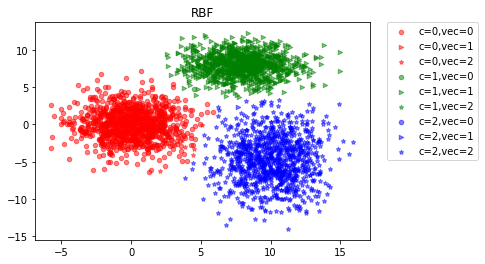

In [48]:
dot=[]
RBF_label=np.asarray(RBF_label)
index0=np.where(RBF_label == 0.0)
index1=np.where(RBF_label == 1.0)
index2=np.where(RBF_label == 2.0)
dot.append(index0[0][np.where(index0[0] < 1000)])
dot.append(index0[0][np.where((index0[0] >=1000)&(index0[0] <2000))])
dot.append(index0[0][np.where(index0[0] >= 2000)])
dot.append(index1[0][np.where(index1[0] < 1000)])
dot.append(index1[0][np.where((index1[0] >=1000)&(index1[0] <2000))])
dot.append(index1[0][np.where(index1[0] >= 2000)])
dot.append(index2[0][np.where(index2[2000:3000] == 0.0)])
dot.append(index2[0][np.where((index2[0] >=1000)&(index2[0] <2000))])
dot.append(index2[0][np.where(index2[0] >= 2000)])

plt.scatter(arr[dot[0],0], arr[dot[0],1], s=20,c='r',marker="o", alpha=0.5, label='c=0,vec=0')
plt.scatter(arr[dot[1],0], arr[dot[1],1], s=20,c='r',marker=">", alpha=0.5, label='c=0,vec=1')
plt.scatter(arr[dot[2],0], arr[dot[2],1], s=20,c='r',marker=(5, 1), alpha=0.5, label='c=0,vec=2')
plt.scatter(arr[dot[3],0], arr[dot[3],1], s=20,c='g',marker="o", alpha=0.5, label='c=1,vec=0')
plt.scatter(arr[dot[4],0], arr[dot[4],1], s=20,c='g',marker=">", alpha=0.5, label='c=1,vec=1')
plt.scatter(arr[dot[5],0], arr[dot[5],1], s=20,c='g',marker=(5, 1), alpha=0.5, label='c=1,vec=2')
plt.scatter(arr[dot[6],0], arr[dot[6],1], s=20,c='b',marker="o", alpha=0.5, label='c=2,vec=0')
plt.scatter(arr[dot[7],0], arr[dot[7],1], s=20,c='b',marker=">", alpha=0.5, label='c=2,vec=1')
plt.scatter(arr[dot[8],0], arr[dot[8],1], s=20,c='b',marker=(5, 1), alpha=0.5, label='c=2,vec=2')

plt.title(title[2])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

In [42]:
#create dense data-train
max_key1 = np.max([np.max(v1.keys()) for v1 in x])
arr1 = np.zeros((len(x),len(max_key1)))

for row1,vec1 in enumerate(x):
    for k1,v1 in vec1.items():
        arr1[row1][k1-1] = v1
x3 = arr1

In [43]:
# RBF: exp(-gamma*|u-v|^2)
gamma = 2e-3;
def LRBF(X,Y):
    RBF = np.exp(-gamma * dist.cdist(X, Y)**2)+gamma*np.dot(X,Y.T)
    return RBF

#create a RBF kernel matrix
KR = np.zeros((3000,3001))
KR[:,1:] = LRBF(x3,x3)
KR[:,:1] = np.arange(3000)[:,np.newaxis]+1

mLR = svm_train(y, KR, '-t 4')

LR_label, LR_acc, LR_val = svm_predict(y, KR, mLR)  #linear+RBF

Accuracy = 99.3667% (2981/3000) (classification)


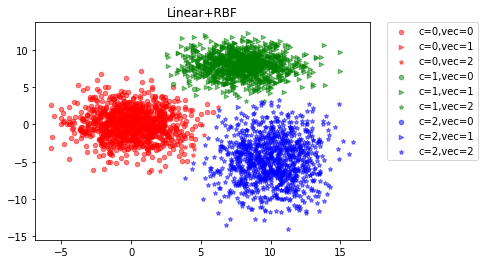

In [49]:
dot=[]
LR_label=np.asarray(LR_label)
index0=np.where(LR_label == 0.0)
index1=np.where(LR_label == 1.0)
index2=np.where(LR_label == 2.0)
dot.append(index0[0][np.where(index0[0] < 1000)])
dot.append(index0[0][np.where((index0[0] >=1000)&(index0[0] <2000))])
dot.append(index0[0][np.where(index0[0] >= 2000)])
dot.append(index1[0][np.where(index1[0] < 1000)])
dot.append(index1[0][np.where((index1[0] >=1000)&(index1[0] <2000))])
dot.append(index1[0][np.where(index1[0] >= 2000)])
dot.append(index2[0][np.where(index2[2000:3000] == 0.0)])
dot.append(index2[0][np.where((index2[0] >=1000)&(index2[0] <2000))])
dot.append(index2[0][np.where(index2[0] >= 2000)])

plt.scatter(arr[dot[0],0], arr[dot[0],1], s=20,c='r',marker="o", alpha=0.5, label='c=0,vec=0')
plt.scatter(arr[dot[1],0], arr[dot[1],1], s=20,c='r',marker=">", alpha=0.5, label='c=0,vec=1')
plt.scatter(arr[dot[2],0], arr[dot[2],1], s=20,c='r',marker=(5, 1), alpha=0.5, label='c=0,vec=2')
plt.scatter(arr[dot[3],0], arr[dot[3],1], s=20,c='g',marker="o", alpha=0.5, label='c=1,vec=0')
plt.scatter(arr[dot[4],0], arr[dot[4],1], s=20,c='g',marker=">", alpha=0.5, label='c=1,vec=1')
plt.scatter(arr[dot[5],0], arr[dot[5],1], s=20,c='g',marker=(5, 1), alpha=0.5, label='c=1,vec=2')
plt.scatter(arr[dot[6],0], arr[dot[6],1], s=20,c='b',marker="o", alpha=0.5, label='c=2,vec=0')
plt.scatter(arr[dot[7],0], arr[dot[7],1], s=20,c='b',marker=">", alpha=0.5, label='c=2,vec=1')
plt.scatter(arr[dot[8],0], arr[dot[8],1], s=20,c='b',marker=(5, 1), alpha=0.5, label='c=2,vec=2')

plt.title(title[3])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

In [6]:
rateL, paramL = find_parameters('./plot_libsvm', '-log2c -8,8,1 -log2g null -t 0 -v 5')

gnuplot executable not found


[local] 0.0 99.5333 (best c=1.0, rate=99.5333)
[local] -4.0 99.4333 (best c=1.0, rate=99.5333)
[local] 5.0 99.4667 (best c=1.0, rate=99.5333)
[local] -6.0 99.4333 (best c=1.0, rate=99.5333)
[local] 3.0 99.5 (best c=1.0, rate=99.5333)
[local] -2.0 99.4667 (best c=1.0, rate=99.5333)
[local] 7.0 99.4667 (best c=1.0, rate=99.5333)
[local] -7.0 99.3667 (best c=1.0, rate=99.5333)
[local] 2.0 99.4667 (best c=1.0, rate=99.5333)
[local] -3.0 99.4333 (best c=1.0, rate=99.5333)
[local] 6.0 99.4667 (best c=1.0, rate=99.5333)
[local] -5.0 99.4 (best c=1.0, rate=99.5333)
[local] 4.0 99.4667 (best c=1.0, rate=99.5333)
[local] -1.0 99.4667 (best c=1.0, rate=99.5333)
[local] 8.0 99.4667 (best c=1.0, rate=99.5333)
[local] -8.0 99.3667 (best c=1.0, rate=99.5333)
[local] 1.0 99.4667 (best c=1.0, rate=99.5333)
1.0 99.5333


In [7]:
rateP, paramP = find_parameters('./plot_libsvm', '-log2c -8,8,1 -log2g null -t 1 -v 5')

gnuplot executable not found


[local] 0.0 99.3667 (best c=1.0, rate=99.3667)
[local] -4.0 99.4333 (best c=0.0625, rate=99.4333)
[local] 5.0 98.4667 (best c=0.0625, rate=99.4333)
[local] -6.0 99.4333 (best c=0.015625, rate=99.4333)
[local] 3.0 99.3333 (best c=0.015625, rate=99.4333)
[local] -2.0 99.3667 (best c=0.015625, rate=99.4333)
[local] 7.0 88.5667 (best c=0.015625, rate=99.4333)
[local] -7.0 99.4333 (best c=0.0078125, rate=99.4333)
[local] 2.0 99.3667 (best c=0.0078125, rate=99.4333)
[local] -3.0 99.4333 (best c=0.0078125, rate=99.4333)
[local] 6.0 87.5333 (best c=0.0078125, rate=99.4333)
[local] -5.0 99.4333 (best c=0.0078125, rate=99.4333)
[local] 4.0 99.3667 (best c=0.0078125, rate=99.4333)
[local] -1.0 99.3667 (best c=0.0078125, rate=99.4333)
[local] 8.0 93.7667 (best c=0.0078125, rate=99.4333)
[local] -8.0 99.4333 (best c=0.00390625, rate=99.4333)
[local] 1.0 99.3667 (best c=0.00390625, rate=99.4333)
0.00390625 99.4333


In [8]:
rateR, paramR = find_parameters('./plot_libsvm', '-log2c -8,8,1 -log2g -8,8,1 -t 2 -v 5')

gnuplot executable not found


[local] 0.0 0.0 99.1333 (best c=1.0, g=1.0, rate=99.1333)
[local] 0.0 -4.0 99.4333 (best c=1.0, g=0.0625, rate=99.4333)
[local] -4.0 0.0 97.5 (best c=1.0, g=0.0625, rate=99.4333)
[local] -4.0 -4.0 99.3667 (best c=1.0, g=0.0625, rate=99.4333)
[local] 0.0 5.0 91.3 (best c=1.0, g=0.0625, rate=99.4333)
[local] -4.0 5.0 67.7333 (best c=1.0, g=0.0625, rate=99.4333)
[local] 5.0 0.0 98.7667 (best c=1.0, g=0.0625, rate=99.4333)
[local] 5.0 -4.0 99.4667 (best c=32.0, g=0.0625, rate=99.4667)
[local] 5.0 5.0 91.7667 (best c=32.0, g=0.0625, rate=99.4667)
[local] 0.0 -6.0 99.4333 (best c=32.0, g=0.0625, rate=99.4667)
[local] -4.0 -6.0 99.3333 (best c=32.0, g=0.0625, rate=99.4667)
[local] 5.0 -6.0 99.5 (best c=32.0, g=0.015625, rate=99.5)
[local] -6.0 0.0 91.0333 (best c=32.0, g=0.015625, rate=99.5)
[local] -6.0 -4.0 99.4 (best c=32.0, g=0.015625, rate=99.5)
[local] -6.0 5.0 67.7333 (best c=32.0, g=0.015625, rate=99.5)
[local] -6.0 -6.0 99.2333 (best c=32.0, g=0.015625, rate=99.5)
[local] 0.0 3.0 97.

[local] -5.0 3.0 84.4 (best c=32.0, g=0.015625, rate=99.5)
[local] -5.0 -2.0 99.1 (best c=32.0, g=0.015625, rate=99.5)
[local] -5.0 7.0 58.1 (best c=32.0, g=0.015625, rate=99.5)
[local] -5.0 -7.0 99.2 (best c=32.0, g=0.015625, rate=99.5)
[local] -5.0 2.0 87.7667 (best c=32.0, g=0.015625, rate=99.5)
[local] -5.0 -3.0 99.3667 (best c=32.0, g=0.015625, rate=99.5)
[local] -5.0 6.0 61.8667 (best c=32.0, g=0.015625, rate=99.5)
[local] -5.0 -5.0 99.4333 (best c=32.0, g=0.015625, rate=99.5)
[local] 0.0 4.0 95.0333 (best c=32.0, g=0.015625, rate=99.5)
[local] -4.0 4.0 76.4 (best c=32.0, g=0.015625, rate=99.5)
[local] 5.0 4.0 95.4 (best c=32.0, g=0.015625, rate=99.5)
[local] -6.0 4.0 76.4 (best c=32.0, g=0.015625, rate=99.5)
[local] 3.0 4.0 95.4 (best c=32.0, g=0.015625, rate=99.5)
[local] -2.0 4.0 88.5667 (best c=32.0, g=0.015625, rate=99.5)
[local] 7.0 4.0 95.3667 (best c=32.0, g=0.015625, rate=99.5)
[local] -7.0 4.0 76.4 (best c=32.0, g=0.015625, rate=99.5)
[local] 2.0 4.0 95.4 (best c=32.0, 

[local] 1.0 0.0 99.2 (best c=16.0, g=0.015625, rate=99.5)
[local] 1.0 -4.0 99.3333 (best c=16.0, g=0.015625, rate=99.5)
[local] 1.0 5.0 91.7 (best c=16.0, g=0.015625, rate=99.5)
[local] 1.0 -6.0 99.3667 (best c=16.0, g=0.015625, rate=99.5)
[local] 1.0 3.0 97.2667 (best c=16.0, g=0.015625, rate=99.5)
[local] 1.0 -2.0 99.3667 (best c=16.0, g=0.015625, rate=99.5)
[local] 1.0 7.0 77.2333 (best c=16.0, g=0.015625, rate=99.5)
[local] 1.0 -7.0 99.4333 (best c=16.0, g=0.015625, rate=99.5)
[local] 1.0 2.0 98.2333 (best c=16.0, g=0.015625, rate=99.5)
[local] 1.0 -3.0 99.4667 (best c=16.0, g=0.015625, rate=99.5)
[local] 1.0 6.0 85.5667 (best c=16.0, g=0.015625, rate=99.5)
[local] 1.0 -5.0 99.3667 (best c=16.0, g=0.015625, rate=99.5)
[local] 1.0 4.0 95.4 (best c=16.0, g=0.015625, rate=99.5)
[local] 1.0 -1.0 99.3 (best c=16.0, g=0.015625, rate=99.5)
[local] 1.0 8.0 66.9667 (best c=16.0, g=0.015625, rate=99.5)
[local] 1.0 -8.0 99.4667 (best c=16.0, g=0.015625, rate=99.5)
[local] 1.0 1.0 98.8 (best c